In [21]:
from nlp_text_messaging.message_cluster import message_cluster

In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import nltk
# List of required NLTK resources
required_resources = ['punkt', 'punkt_tab']

openai_key = os.getenv("OPENAI_API_KEY")

In [34]:
temp = message_cluster('../data/tabular/cap2.csv',openai_key,1,1)
# print(temp.df.head())

In [24]:
temp.topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,467,-1_room_crazy_just_rubber,"[room, crazy, just, rubber, rats, like, make, ...",[Guys What if we just all dont show up Im down...
1,0,57,0_nextcloud_app_project_integration,"[nextcloud, app, project, integration, use, us...",[is that we are the FIRST STUDENTS to use Next...
2,1,49,1_job_resume_internship_thank,"[job, resume, internship, thank, leetcode, wor...",[Ready to launch your career in tech and land ...
3,2,42,2_lol_thats_ok_gc,"[lol, thats, ok, gc, thank, yeah, tho, ill, ok...","[ROFLMFAO sorry yeah Im just omega dizzy, Lol,..."
4,3,41,3_yes_yep_yeah_yup,"[yes, yep, yeah, yup, oh, yuhhh, completely, o...","[Yes, Yes, Yes]"
5,4,36,4_api_apis_learn_database,"[api, apis, learn, database, engineering, soft...",[Bro lol i took cen 4010 and learned nothing a...
6,5,34,5_semester_graduation_graduate_graduating,"[semester, graduation, graduate, graduating, t...","[Legit, pay again for the classes and start a ..."
7,6,31,6_numbers_12_mind_set,"[numbers, 12, mind, set, 100, days, aint, 930,...",[im pretty sure well get our poster at 12 caus...
8,7,29,7_videos_video_demo_project,"[videos, video, demo, project, intro, informat...",[we didnt submit ours yet. but im not doing th...
9,8,27,8_posters_poster_templates_pick,"[posters, poster, templates, pick, template, s...",[Yeah check in announcements youll find templa...


In [25]:
temp.generate_topic_summary(25)

'The text is a conversation among individuals regarding the correct dimensions for submitting posters. They discuss the confusion between different sizes when saving files as PDFs, particularly in relation to whether the dimensions are 48x36 or 64x48. They offer various suggestions on how to verify the dimensions, such as checking the properties of the document in Acrobat or viewing it in different browsers like Chrome or Firefox. The conversation also covers issues with slide sizes in PowerPoint and provides troubleshooting tips for ensuring the correct dimensions are maintained throughout the submission process.'

In [26]:
temp.generate_topic_name(25)

'Checking and Adjusting PDF Sizes for Submission'

In [27]:
temp.topic_model.get_representative_docs(-1)

['Guys What if we just all dont show up Im down',
 'Same here, said the same thing to my team.. even tho my team consist of only two ppl since the other guy dropped the class he said hell give you an incomplete too? Yup We deadass said last week what we were planning to work on and what we needed to focus on and he sent us an email telling us it looks great and how good the progress is and then today when we show off exactly that he literally says that we dont have a working demo oh nahhhhh No shot And were handicapped lmao nahhhh thats crazy We have only two And we work full time and shit',
 'Homosexuality Crazy? I was crazy once. they locked me in a room. a rubber room. a rubber room with rats. and rats make me crazy. Crazy? I was crazy once. they locked me in a room. a rubber room. a rubber room with rats. and rats make me crazy. Crazy? I was crazy once. they locked me in a room. a rubber room. a rubber room with rats. and rats make me crazy. Crazy? I was crazy once. they locked me 

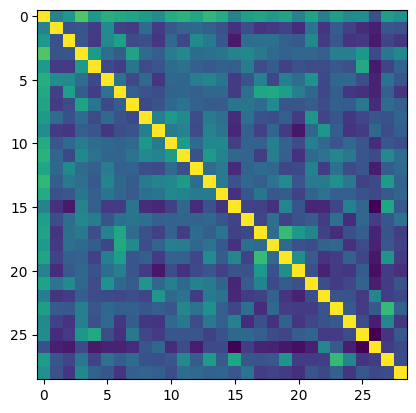

In [28]:
similarity_matrix = cosine_similarity(np.array(temp.topic_model.topic_embeddings_)[:, :])
labels = (temp.topic_model.get_topic_info().sort_values("Topic", ascending=True).Name)[1:]
plt.imshow(similarity_matrix)

In [29]:
def find_similar_pairs(similarity_matrix, threshold):
    n = similarity_matrix.shape[0]
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            if similarity_matrix[i, j] > threshold:
                pairs.append((i, j))
    return pairs

In [30]:
similar = find_similar_pairs(similarity_matrix, 0.5)

In [32]:
temp.topic_model.generate_topic_labels()

['-1_room_crazy_just',
 '0_nextcloud_app_project',
 '1_job_resume_internship',
 '2_lol_thats_ok',
 '3_yes_yep_yeah',
 '4_api_apis_learn',
 '5_semester_graduation_graduate',
 '6_numbers_12_mind',
 '7_videos_video_demo',
 '8_posters_poster_templates',
 '9_sprint_showcase_scrum',
 '10_announcement_announcements_deliverable',
 '11_cs_member_group',
 '12_product_owner_canvas',
 '13_team_form_rubric',
 '14_mr_meet_epic',
 '15_thank_thanks_service',
 '16_class_fail_stressed',
 '17_tickets_selling_ticket',
 '18_professor_dean_lmao',
 '19_shes_rahn_switched',
 '20_project_projects_blow',
 '21_print_printing_handle',
 '22_email_confirmation_aight',
 '23_po_responsive_busy',
 '24_real_freshly_facts',
 '25_pdf_properties_open',
 '26_email_emailed_responds',
 '27_nvm_deez_heaaa']